In [29]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random
from models.Models import KMeans
from utils.utils import load
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.mixture import GaussianMixture


In [30]:
X_train,y_train,X_test,y_test, X_real, y = load("data/complete", "RiskPerformance", True, return_df = True)

In [31]:
kmeans =KMeans(2)
clusters = kmeans.fit_predict(X_real.values)

In [32]:
pca = PCA(2)
X = pca.fit_transform(X_real)
X_cluster = X

In [18]:
X

array([[ 0.42636887, -0.0257099 ],
       [ 0.70331302, -2.10291737],
       [ 1.07465681, -0.19945094],
       ...,
       [-1.95987998, -1.41689077],
       [-1.77476244,  0.63289946],
       [ 2.36548437, -0.05433995]])

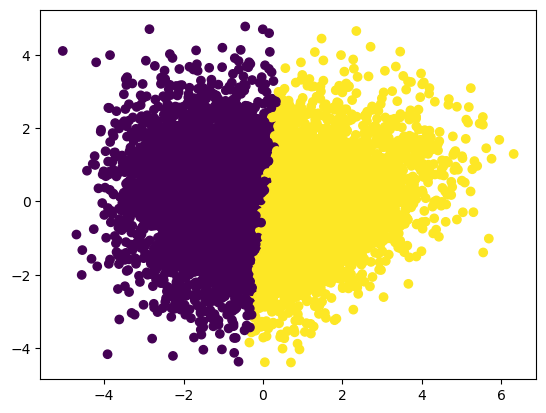

In [19]:
plt.scatter(X[:,0], X[:,1], c = clusters)

In [20]:
not_na = np.where(~np.isnan(y))

In [1]:
# plt.scatter(X[not_na,0], X[not_na,1], c = y[not_na])

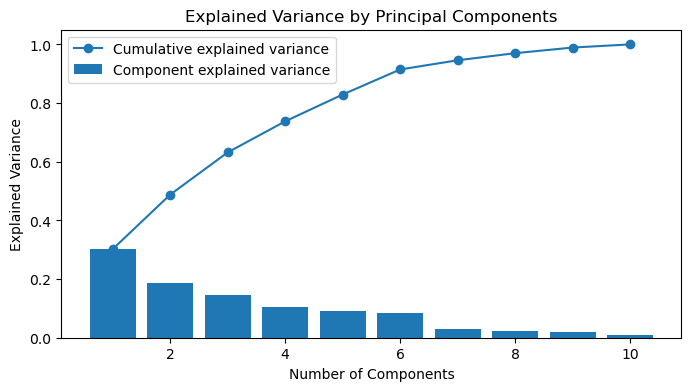

Total variance explained by selected components: 1.00


In [22]:
# Plot Explained Variance by Principal Components

pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_real)
columns = X_real.columns

plt.figure(figsize=(8, 4))
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_, label = "Component explained variance")
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', label = "Cumulative explained variance")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

print(f"Total variance explained by selected components: {sum(pca.explained_variance_ratio_):.2f}")

Text(0.5, 0.98, 'Principal Components')

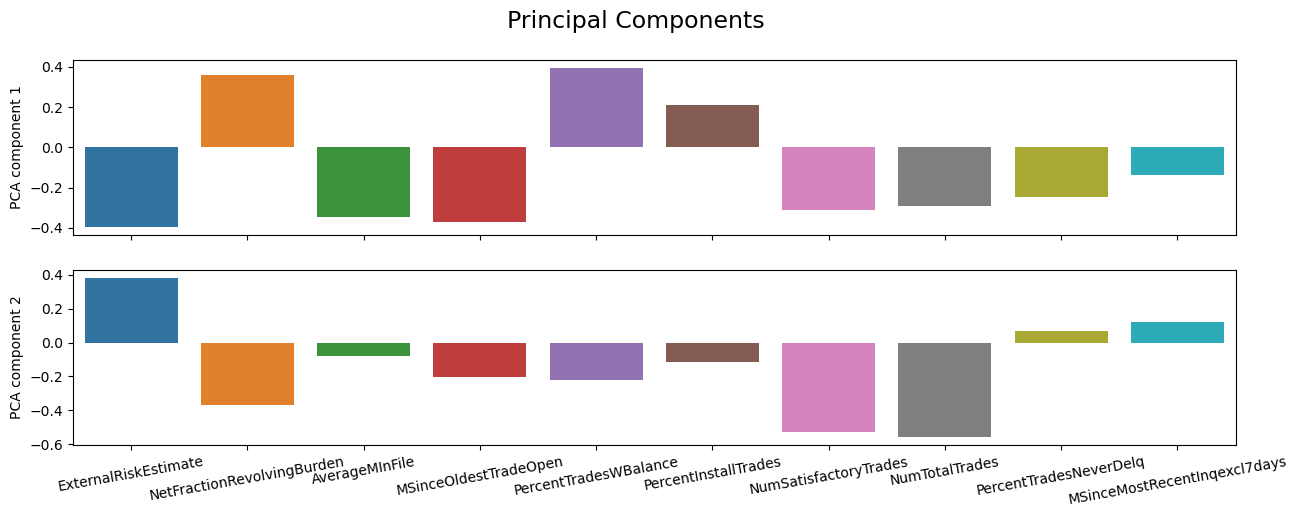

In [23]:
fig, axes = plt.subplots(len(pca.components_[:2]), 1, figsize = (15,5), sharex = True)
for i, (component, ax) in enumerate(zip(pca.components_, axes), 1):
    # ax.bar(range(1, len(component) + 1), component)
    g = sns.barplot(x = columns, y = component, ax= ax)
    
    ax.set_ylabel(f"PCA component {i}")
    plt.xticks(rotation=10)
    if i == 1:
        plt.setp(g.axes, xticks=[], xlabel='')
# plt.legend(bbox_to_anchor=(1 , 1), borderaxespad=0)
plt.suptitle("Principal Components", size = 17)

In [24]:
columns

Index(['ExternalRiskEstimate', 'NetFractionRevolvingBurden', 'AverageMInFile',
       'MSinceOldestTradeOpen', 'PercentTradesWBalance',
       'PercentInstallTrades', 'NumSatisfactoryTrades', 'NumTotalTrades',
       'PercentTradesNeverDelq', 'MSinceMostRecentInqexcl7days'],
      dtype='object')

In [ ]:
import pandas as pd


component_df = pd.DataFrame(pca.components_, columns = columns)

In [2]:

# fig, axes = plt.subplots(len(pca.components_[:2]), 1, figsize = (15,5))
# for i, (component, ax) in enumerate(zip(pca.components_, axes), 1):
#     # ax.bar(range(1, len(component) + 1), component)
#     g = sns.barplot(x = columns, y = component, ax= ax, hue = "y", dodge = False)
#     plt.setp(g.axes, xticks=[], xlabel='')
#     ax.set_ylabel(f"PCA component {i}")
# plt.legend(bbox_to_anchor=(1 , 1), borderaxespad=0)
# plt.tight_layout()

c:\Users\jurko\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


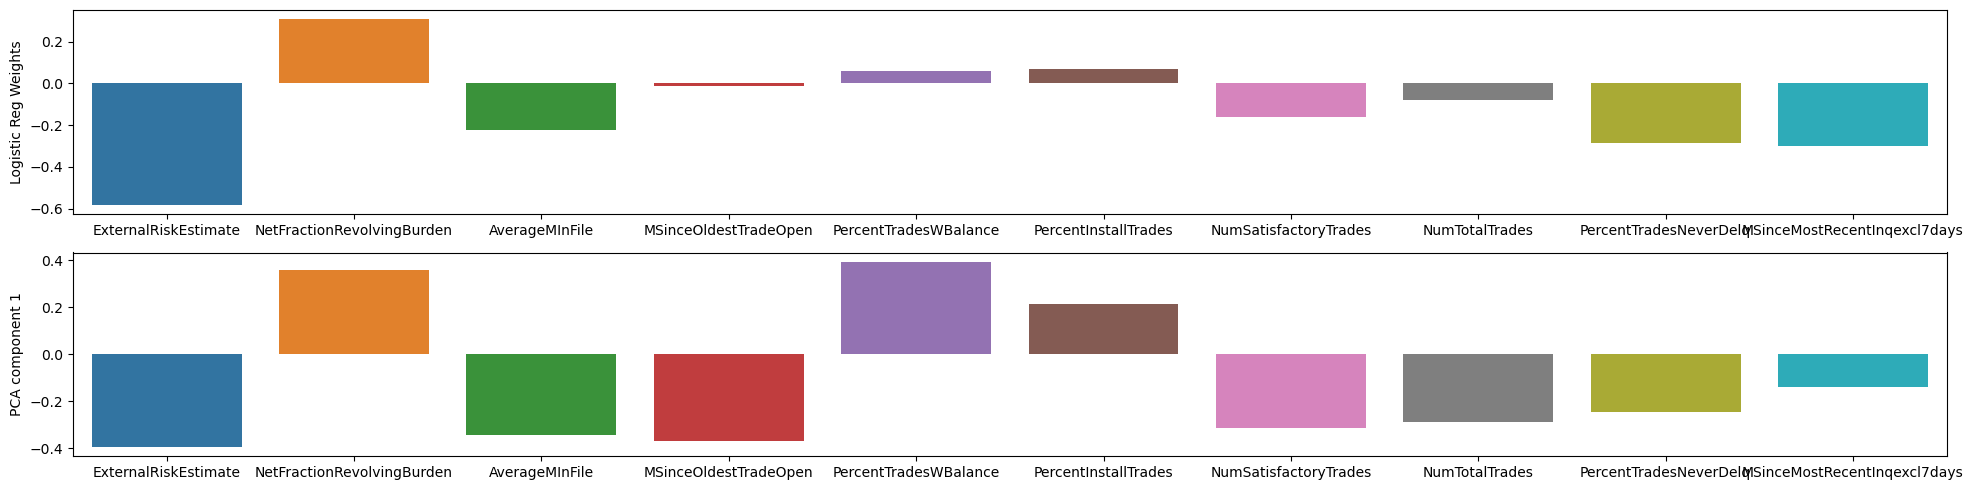

In [28]:
from models.Models import LogisticRegressor
from cleaning_data.DataPipeline import PipelineCV
from utils_parameter_search.dataset_params import datasets
pipeline = PipelineCV("RiskPerformance", **datasets["complete"])
X_linear, y_linear = pipeline.fit_transform(X_train, y_train)
linear_regressor = LogisticRegressor()
params_of_fit= {
    "penalty": 'ridge',
    "C": 36246.527488040396,
    "learning_rate": 0.00805923446420495,
    "num_iterations": 2000
  }
linear_regressor.fit(X_linear, y_linear, **params_of_fit)
fig, axes = plt.subplots(2, 1, figsize = (20,5))
sns.barplot(x = columns, y = linear_regressor.weights, ax = axes[0])
axes[0].set_ylabel(f"Logistic Reg Weights")
sns.barplot(x = columns, y = pca.components_[0], ax = axes[1])
axes[1].set_ylabel(f"PCA component 1")
plt.tight_layout()

In [39]:
# explained_var_ratio = pca.explained_variance_ratio_
# cumulative_var_ratio = np.cumsum(explained_var_ratio)

# plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', color="hotpink")
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Explained Variance Ratio vs. Number of Principal Components')
# plt.show()

In [51]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = range(2, 8)

pca = PCA(2)
X = pca.fit_transform(X_real)


def cluster_analysis(range_n_clusters, X, clusterer_model):
    WCSS = []
    silhouette_scores = []

    fig, axes = plt.subplots(math.ceil(len(range_n_clusters)/2) + 1, 2, figsize = (15,20))
    axes = axes.reshape((-1))

    for n_clusters, ax1 in zip(range_n_clusters, axes):
        # Create a subplot with 1 row and 2 columns
        # fig, (ax1, ax2) = plt.subplots(1, 2)
        # fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.

        clusterer = clusterer_model(n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        wcss = 0
        for i in range(n_clusters):
            points_of_cluster = np.where(cluster_labels == i)
            try:
                wcss += np.sum((X[points_of_cluster] - clusterer.cluster_centers_[i])**2)
            except:
                pass


            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        WCSS.append(wcss)

        ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Labeling the clusters
        # centers = clusterer.cluster_centers_


        # plt.suptitle(
        #     "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        #     % n_clusters,
        #     fontsize=14,
        #     fontweight="bold",
        # )
    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # fig, axes = fig.subplots(1,2)
    # print(axes)
    range_n_clusters = [str(i) for i in range_n_clusters]
    # fig.set_size_inches(18, 7)
    axes[-2].plot(range_n_clusters, WCSS, ".-", label = "WCSS")
    plt.ylabel("WCSS")
    plt.xlabel("Number of clusters")
    axes[-1].plot(range_n_clusters, silhouette_scores, ".-", label = "Silhouette scores")
    plt.ylabel("Silhouette scores")
    plt.xlabel("Number of clusters")
        # plt.show()
    plt.tight_layout()
    


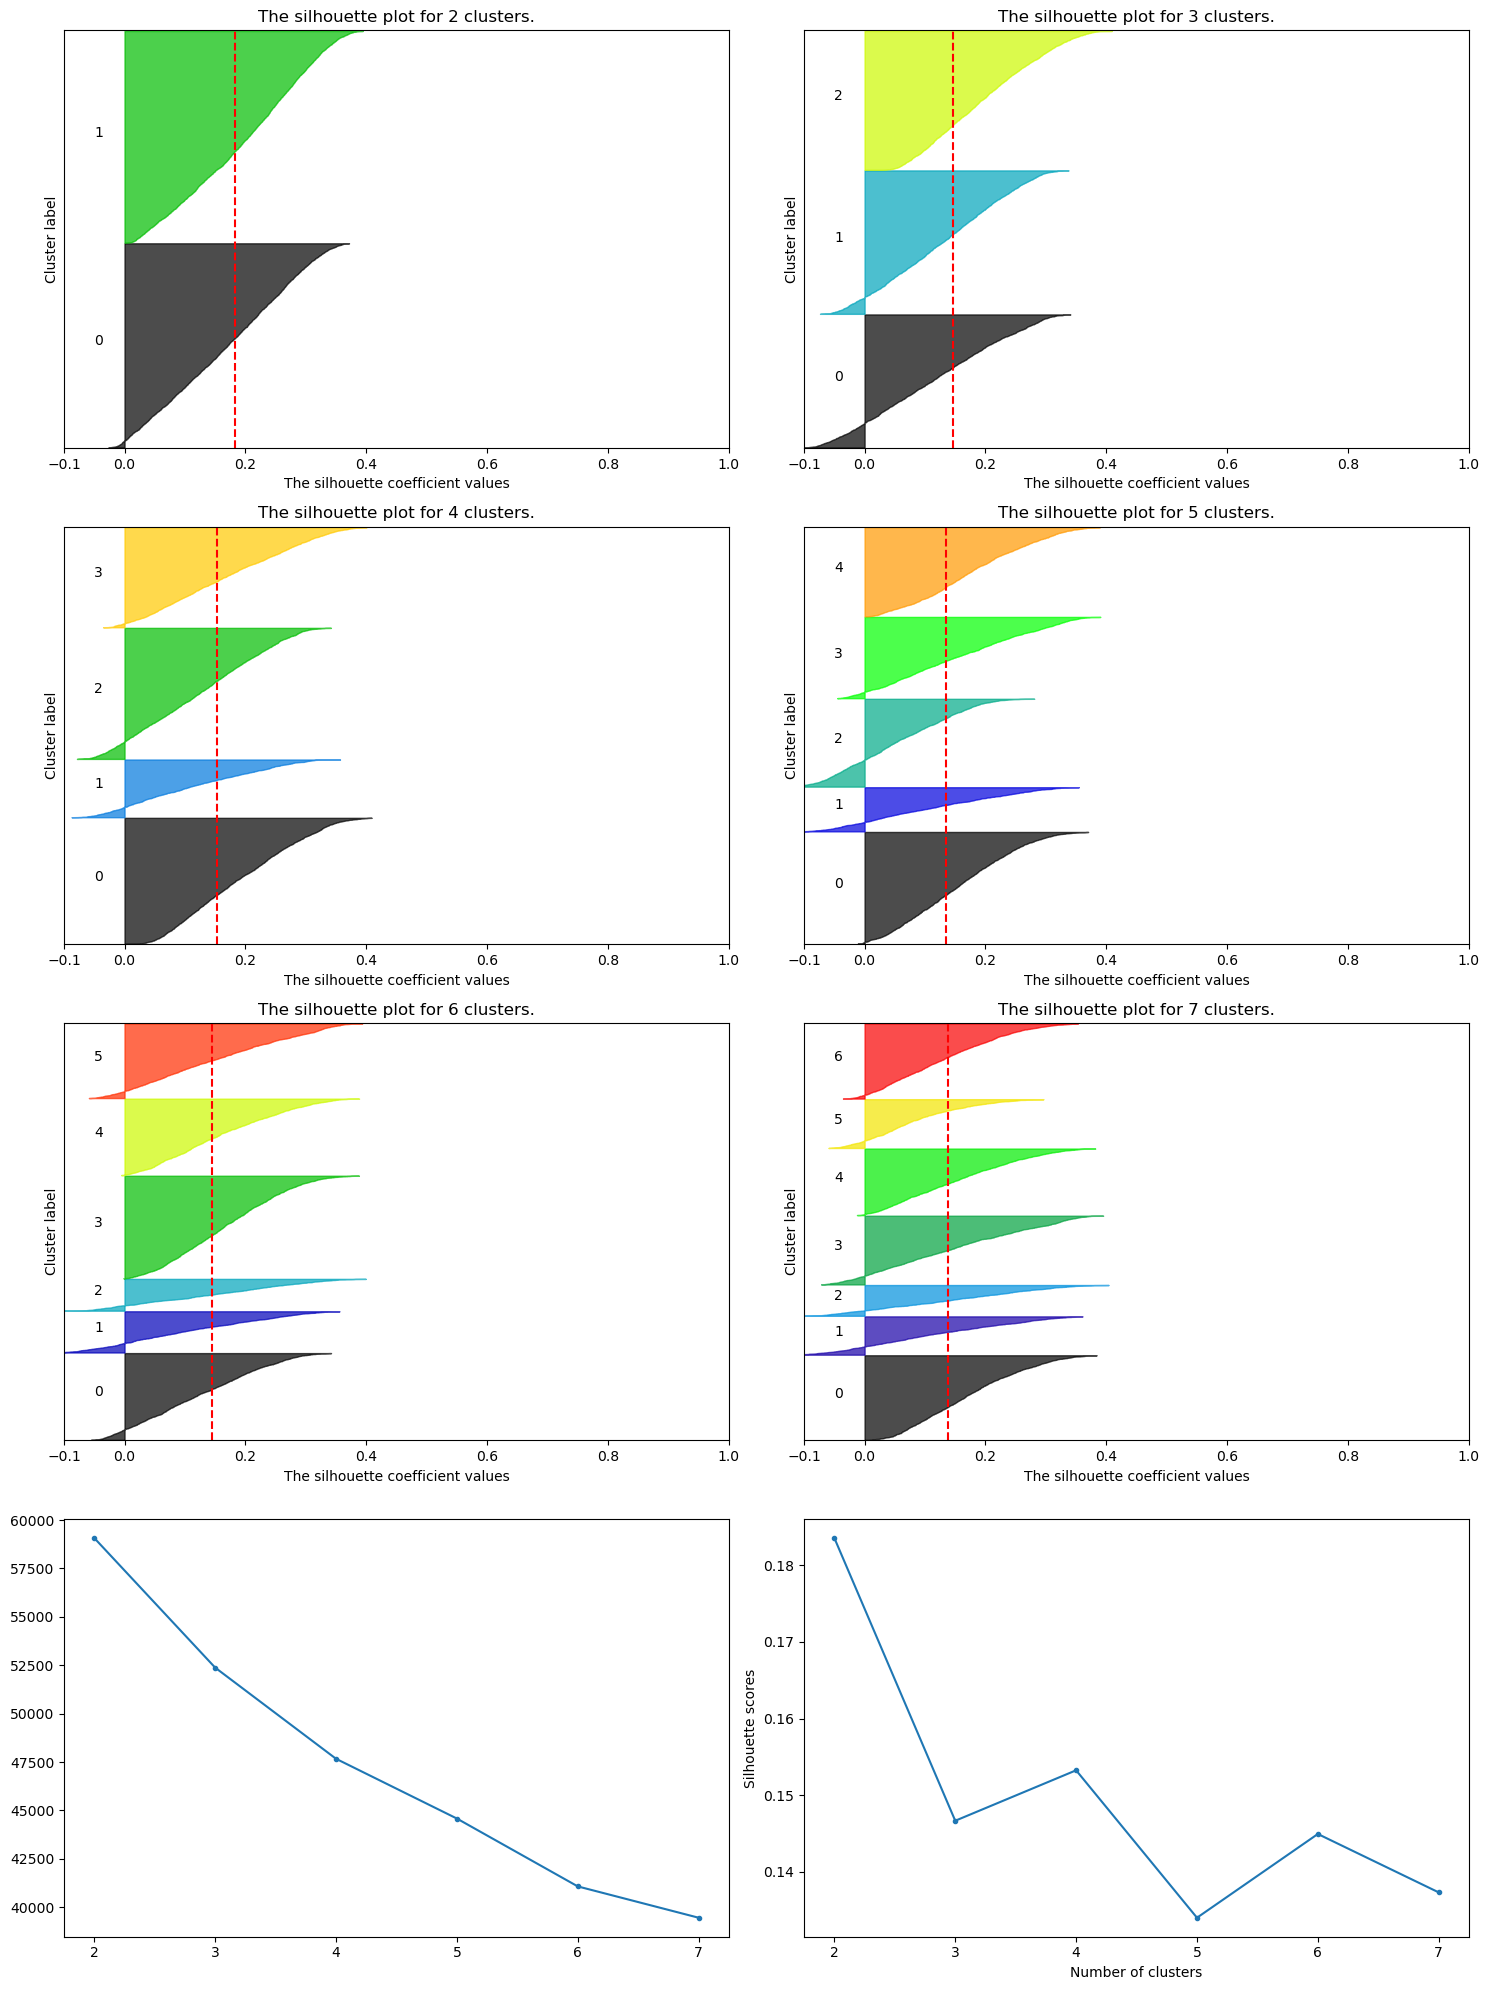

In [52]:
cluster_analysis(range_n_clusters, X_real.values, KMeans)

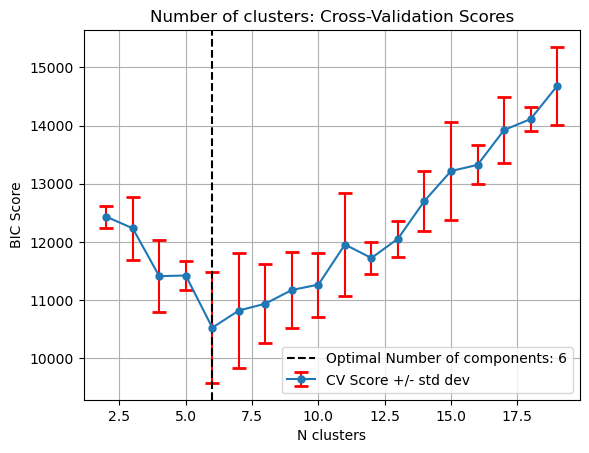

In [39]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(2, 20),
    "covariance_type": ["full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score, cv=10
)
grid_search.fit(X_real)
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score", 'std_test_score']
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
        "std_test_score":"std score"
    }
)
df.sort_values(by="BIC score")
plt.errorbar(df["Number of components"], df["BIC score"], yerr=df["std score"], fmt='-o', ecolor='r', capsize=5, capthick=2, markersize=5, label='CV Score +/- std dev')
optimum = df.loc[df["BIC score"] == df["BIC score"].min(), "Number of components"].iloc[0]
plt.axvline(x=optimum, linestyle='--', color='k', label=f'Optimal Number of components: {optimum}')

plt.title('Number of clusters: Cross-Validation Scores')
plt.xlabel('N clusters')
plt.ylabel('BIC Score')
plt.legend()

plt.grid(True)
plt.show()

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
## Hierarchical clustering -------------------------------------------------------------------------------------------------------
# hierarchical clustering
# linked = linkage(X_real.values, 'ward')
# plt.figure(figsize=(10, 7))
# dendrogram(linked,
#            p = 2,
#             orientation='top',
#             labels=X_real.index, # labels of the rows
#             truncate_mode= 'none', # No truncation of the tree
#             above_threshold_color='k', # Differentiate color above threshold
#             color_threshold=120, #Threshold value for deciding leaves color
#             distance_sort='descending')
# plt.gca().set_title('Dendrogram using no truncation')
# plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_distances=True)

model = model.fit(X_real.values)


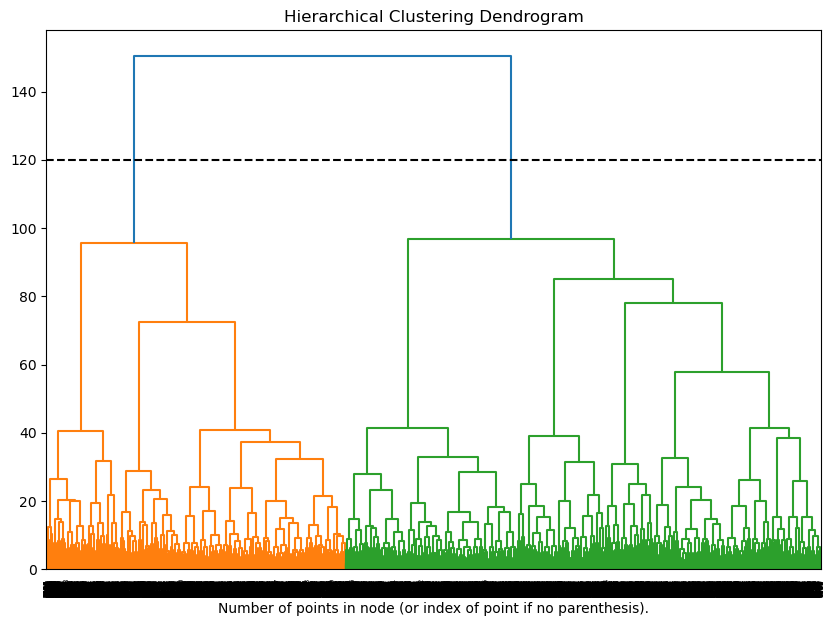

In [37]:
# plot the top three levels of the dendrogram
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
altura_corte = 120
plot_dendrogram(model, color_threshold=altura_corte,ax=ax)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

# plt.axhline(model.distances_, xmin = 0, xmax = 20, linestyles="dashed")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
plt.show()

array([  0.        ,   0.23317972,   0.32235207, ...,  95.71054809,
        96.81323183, 150.48493717])

Text(0.5, 1.0, 'Hierarchical clustering')

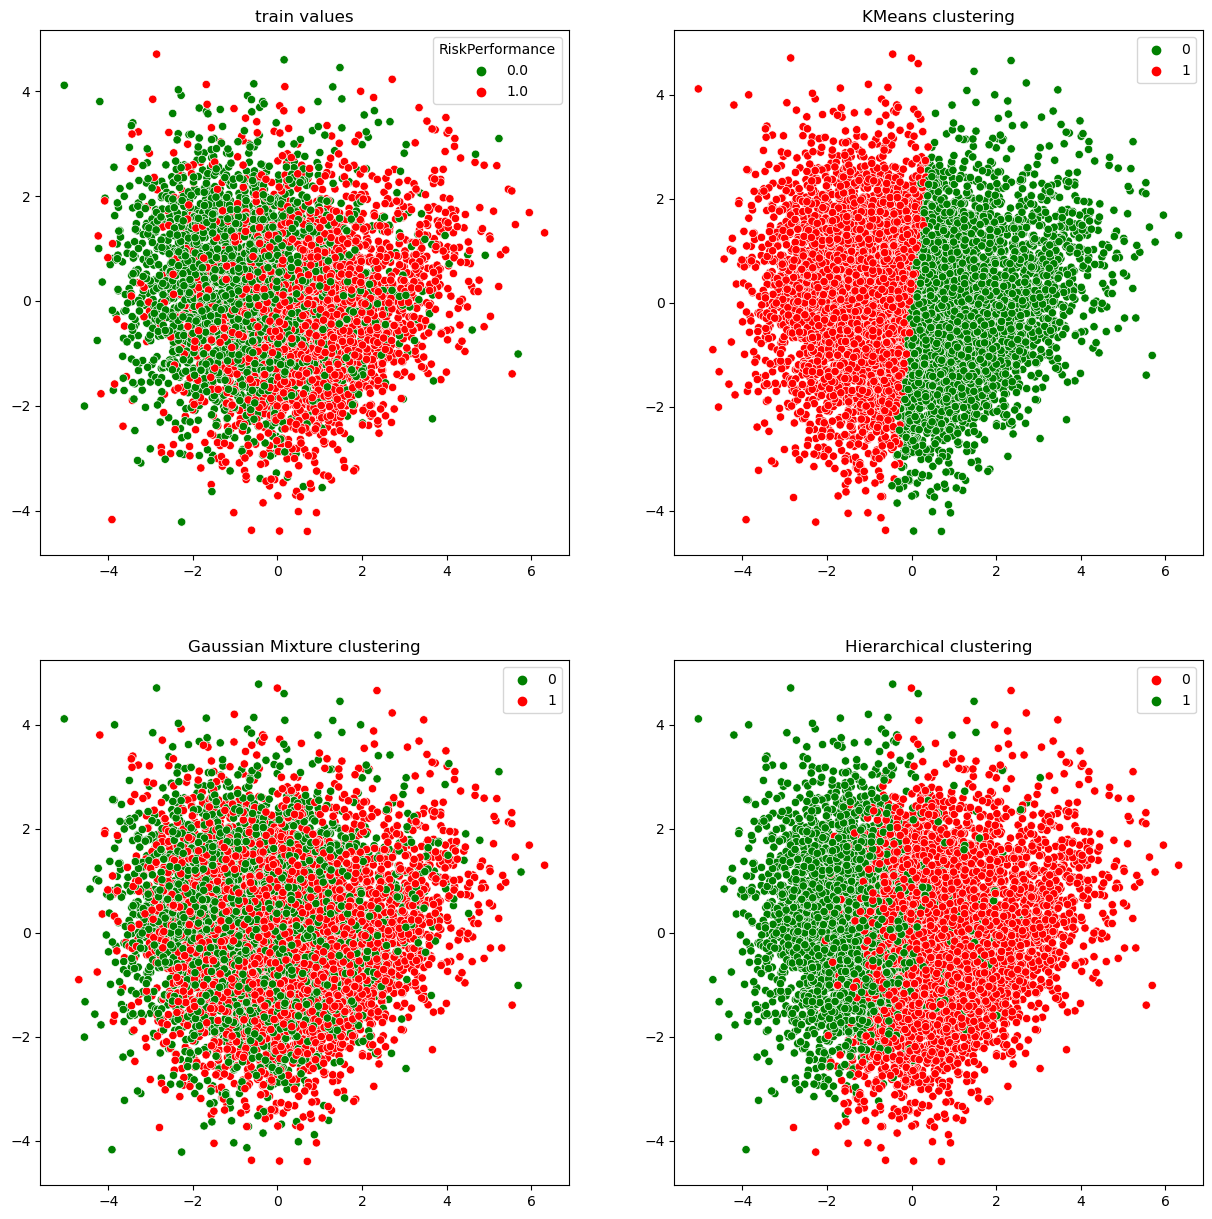

In [6]:
pca = PCA(2)
X = pca.fit_transform(X_real)
fig, axes = plt.subplots(2,2, figsize = (15, 15))
kmeans = KMeans(2)

clusters_kmeans = kmeans.fit_predict(X_real.values)
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = y, ax = axes[0,0], palette = {0:"Green", 1: "Red"})
axes[0,0].set_title("train values")
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = clusters_kmeans, ax = axes[0,1],palette = {0:"Green", 1: "Red"})
axes[0,1].set_title("KMeans clustering")

gm = GaussianMixture(2, random_state = 0)
# pca = PCA(2)
# X = pca.fit_transform(X_real)
# fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))

clusters_gauss = gm.fit_predict(X_real.values)
# sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = y, ax = axes[1,0], palette = {0:"Green", 1: "Red"})
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = clusters_gauss, ax = axes[1,0],palette = {0:"Green", 1: "Red"})
axes[1,0].set_title("Gaussian Mixture clustering")
# axes[1,0].set_title("train Values")
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
clusters_hierarchical = model.fit_predict(X_real.values)
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = clusters_hierarchical, ax = axes[1,1],palette = {1:"Green", 0: "Red"})
axes[1,1].set_title("Hierarchical clustering")
# plt.suptitle("Clusters")
# plt.suptitle("HOLa")
# plt.tight_layout()

Text(0.5, 0.98, 'Confusion Matrices of Clustering Methods')

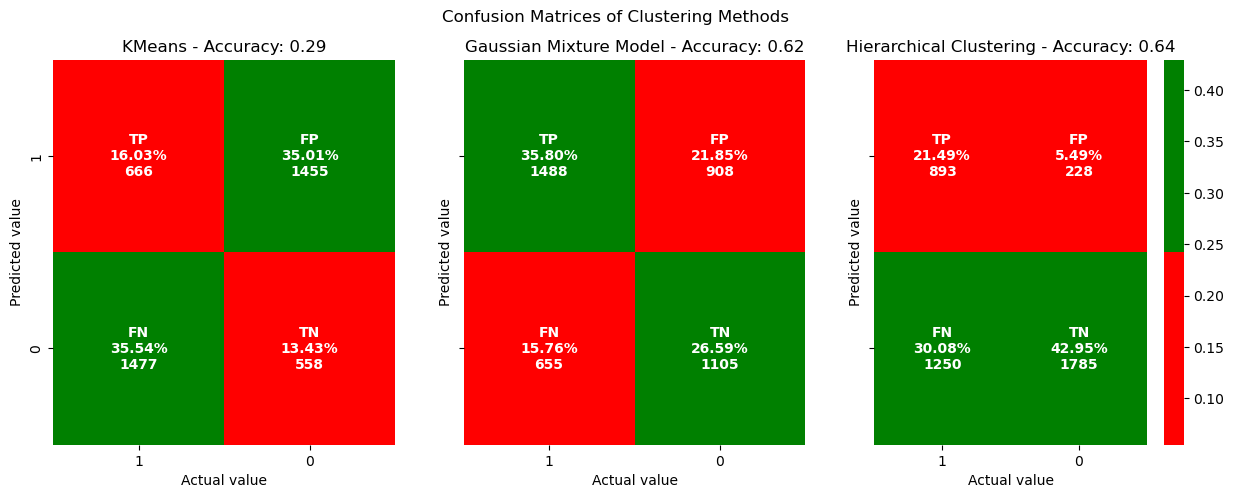

In [8]:
from sklearn.metrics import accuracy_score
from utils.utils import plot_confusion_matrix, classification_report, evaluate_classification_metrics

clusters_kmeans = kmeans.predict(X_train.values)
clusters_gauss = gm.predict(X_train.values)
clusters_hierarchical = model.fit_predict(X_train.values)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5),sharey =True)
confussion_matrix = evaluate_classification_metrics(y_train.values, clusters_kmeans, 1)["Confusion Matrix"]
g = plot_confusion_matrix(confussion_matrix, ax1, cbar = False)
ax1.set_title(f"KMeans - Accuracy: {accuracy_score(y_train, clusters_kmeans):.02f}")
ax1.set_xlabel("Actual value")
ax1.set_ylabel("Predicted value")
ax1.set_ylim(0, 0.40)
# classification_report(y_train.values, clusters_kmeans, 1)

confussion_matrix = evaluate_classification_metrics(y_train.values, clusters_gauss, 1)["Confusion Matrix"]
g2 = plot_confusion_matrix(confussion_matrix, ax2, cbar = False)
ax2.set_title(f"Gaussian Mixture Model - Accuracy: {accuracy_score(y_train, clusters_gauss):.02f}")
ax2.set_xlabel("Actual value")
ax2.set_ylabel("Predicted value")


confussion_matrix = evaluate_classification_metrics(y_train.values, clusters_hierarchical, 1)["Confusion Matrix"]
g3 = plot_confusion_matrix(confussion_matrix, ax3)
ax3.set_title(f"Hierarchical Clustering - Accuracy: {accuracy_score(y_train, clusters_hierarchical):.02f}")

plt.suptitle("Confusion Matrices of Clustering Methods")


In [ ]:
from utils.utils import classification_report


classification_report(y)

<Axes: >

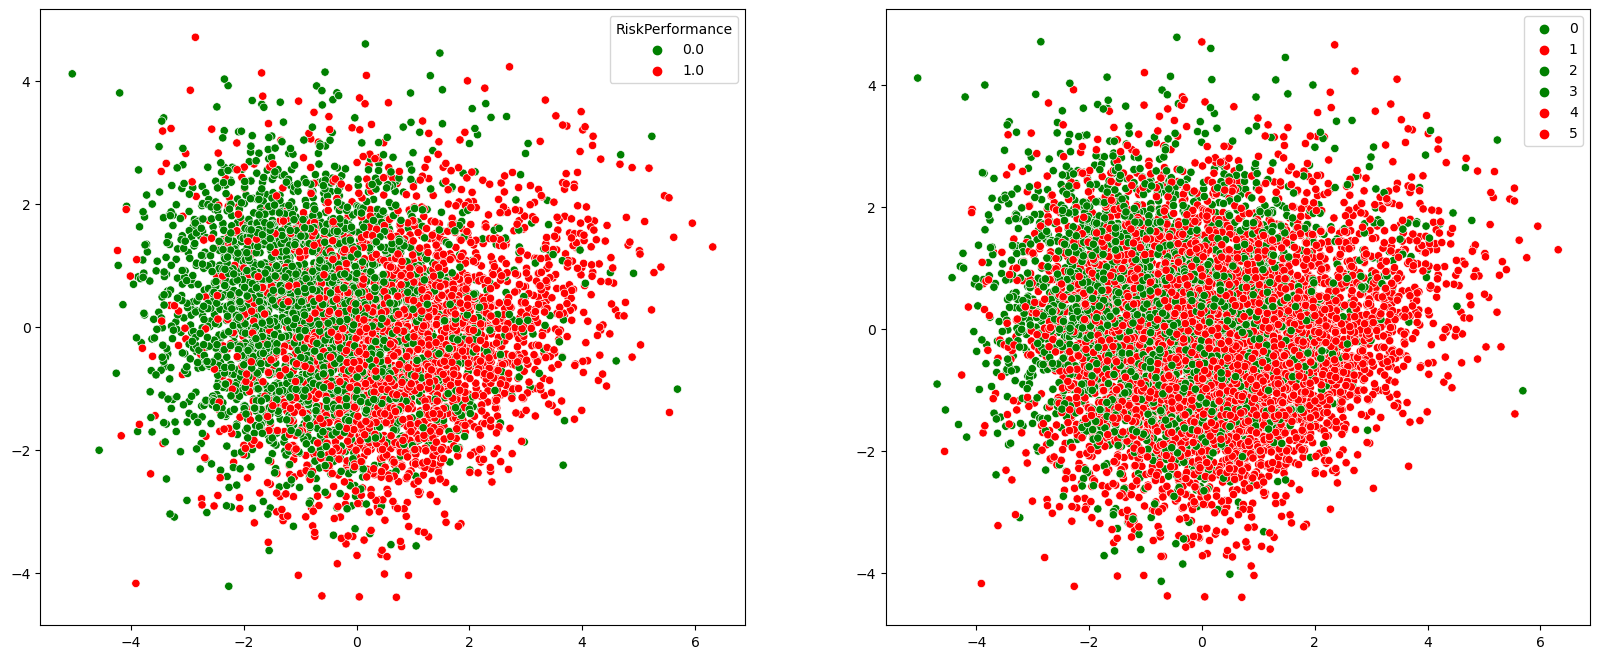

In [42]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(6, random_state = 0)
pca = PCA(2)
X = pca.fit_transform(X_real.values)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))

clusters = gm.fit_predict(X_real.values)
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = y, ax = ax1, palette = {0:"Green", 1: "Red"})
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = clusters, ax = ax2, palette = {0:"Green", 1: "Red", 2:"Green", 3:"Green", 4:"Red", 5:"Red"})

<Axes: >

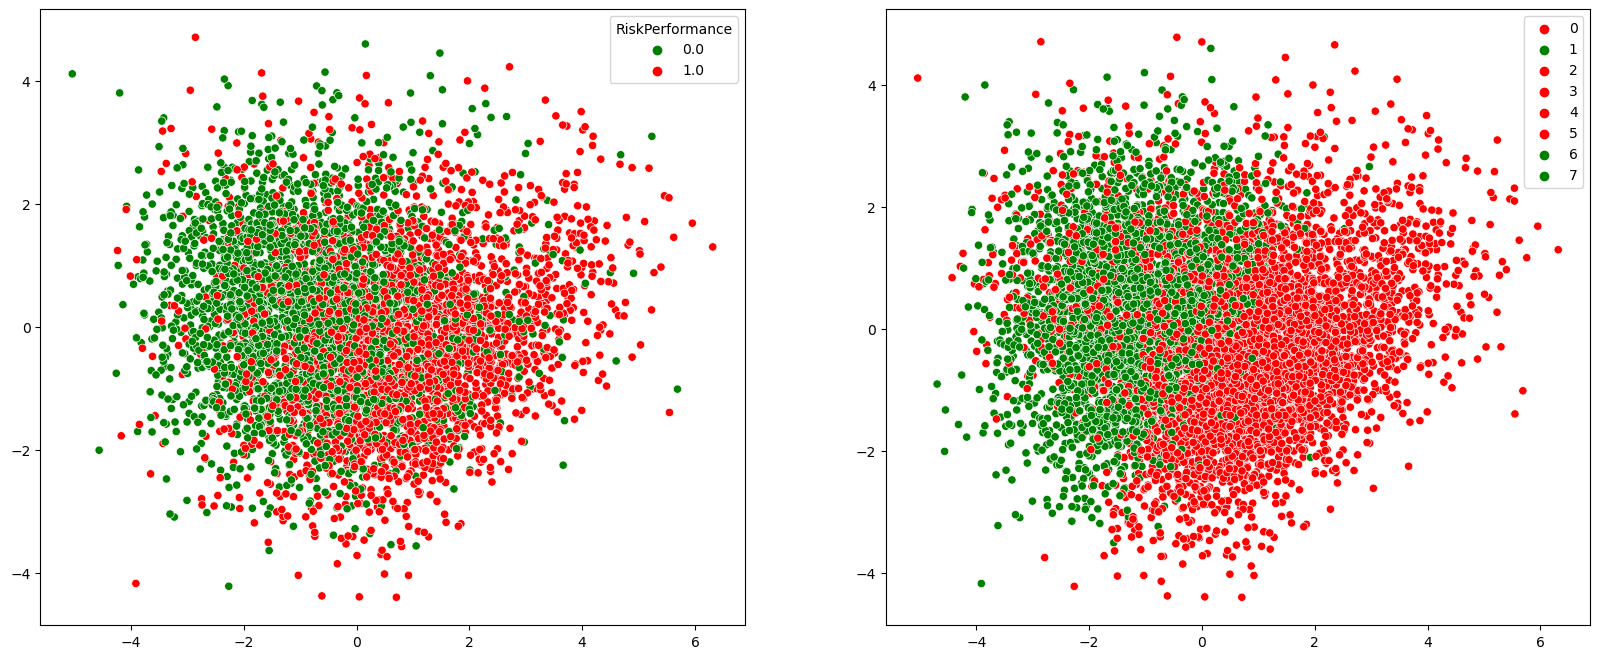

In [69]:
from sklearn.mixture import GaussianMixture
gm = AgglomerativeClustering(n_clusters=8)
pca = PCA(2)
X = pca.fit_transform(X_real.values)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))

clusters = gm.fit_predict(X_real.values)
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = y, ax = ax1, palette = {0:"Green", 1: "Red"})
sns.scatterplot(x = X[:, 0], y =  X[:,1], hue = clusters, ax = ax2, palette={0: "Red", 1:"Green", 2:"Red", 3:"Red", 4:"Red", 5:"Red", 6:"Green", 7: "Green"})

In [69]:
X_generated = gm.sample(4000)

In [78]:
X_generated_df = pd.DataFrame(X_generated[0], columns = columns)

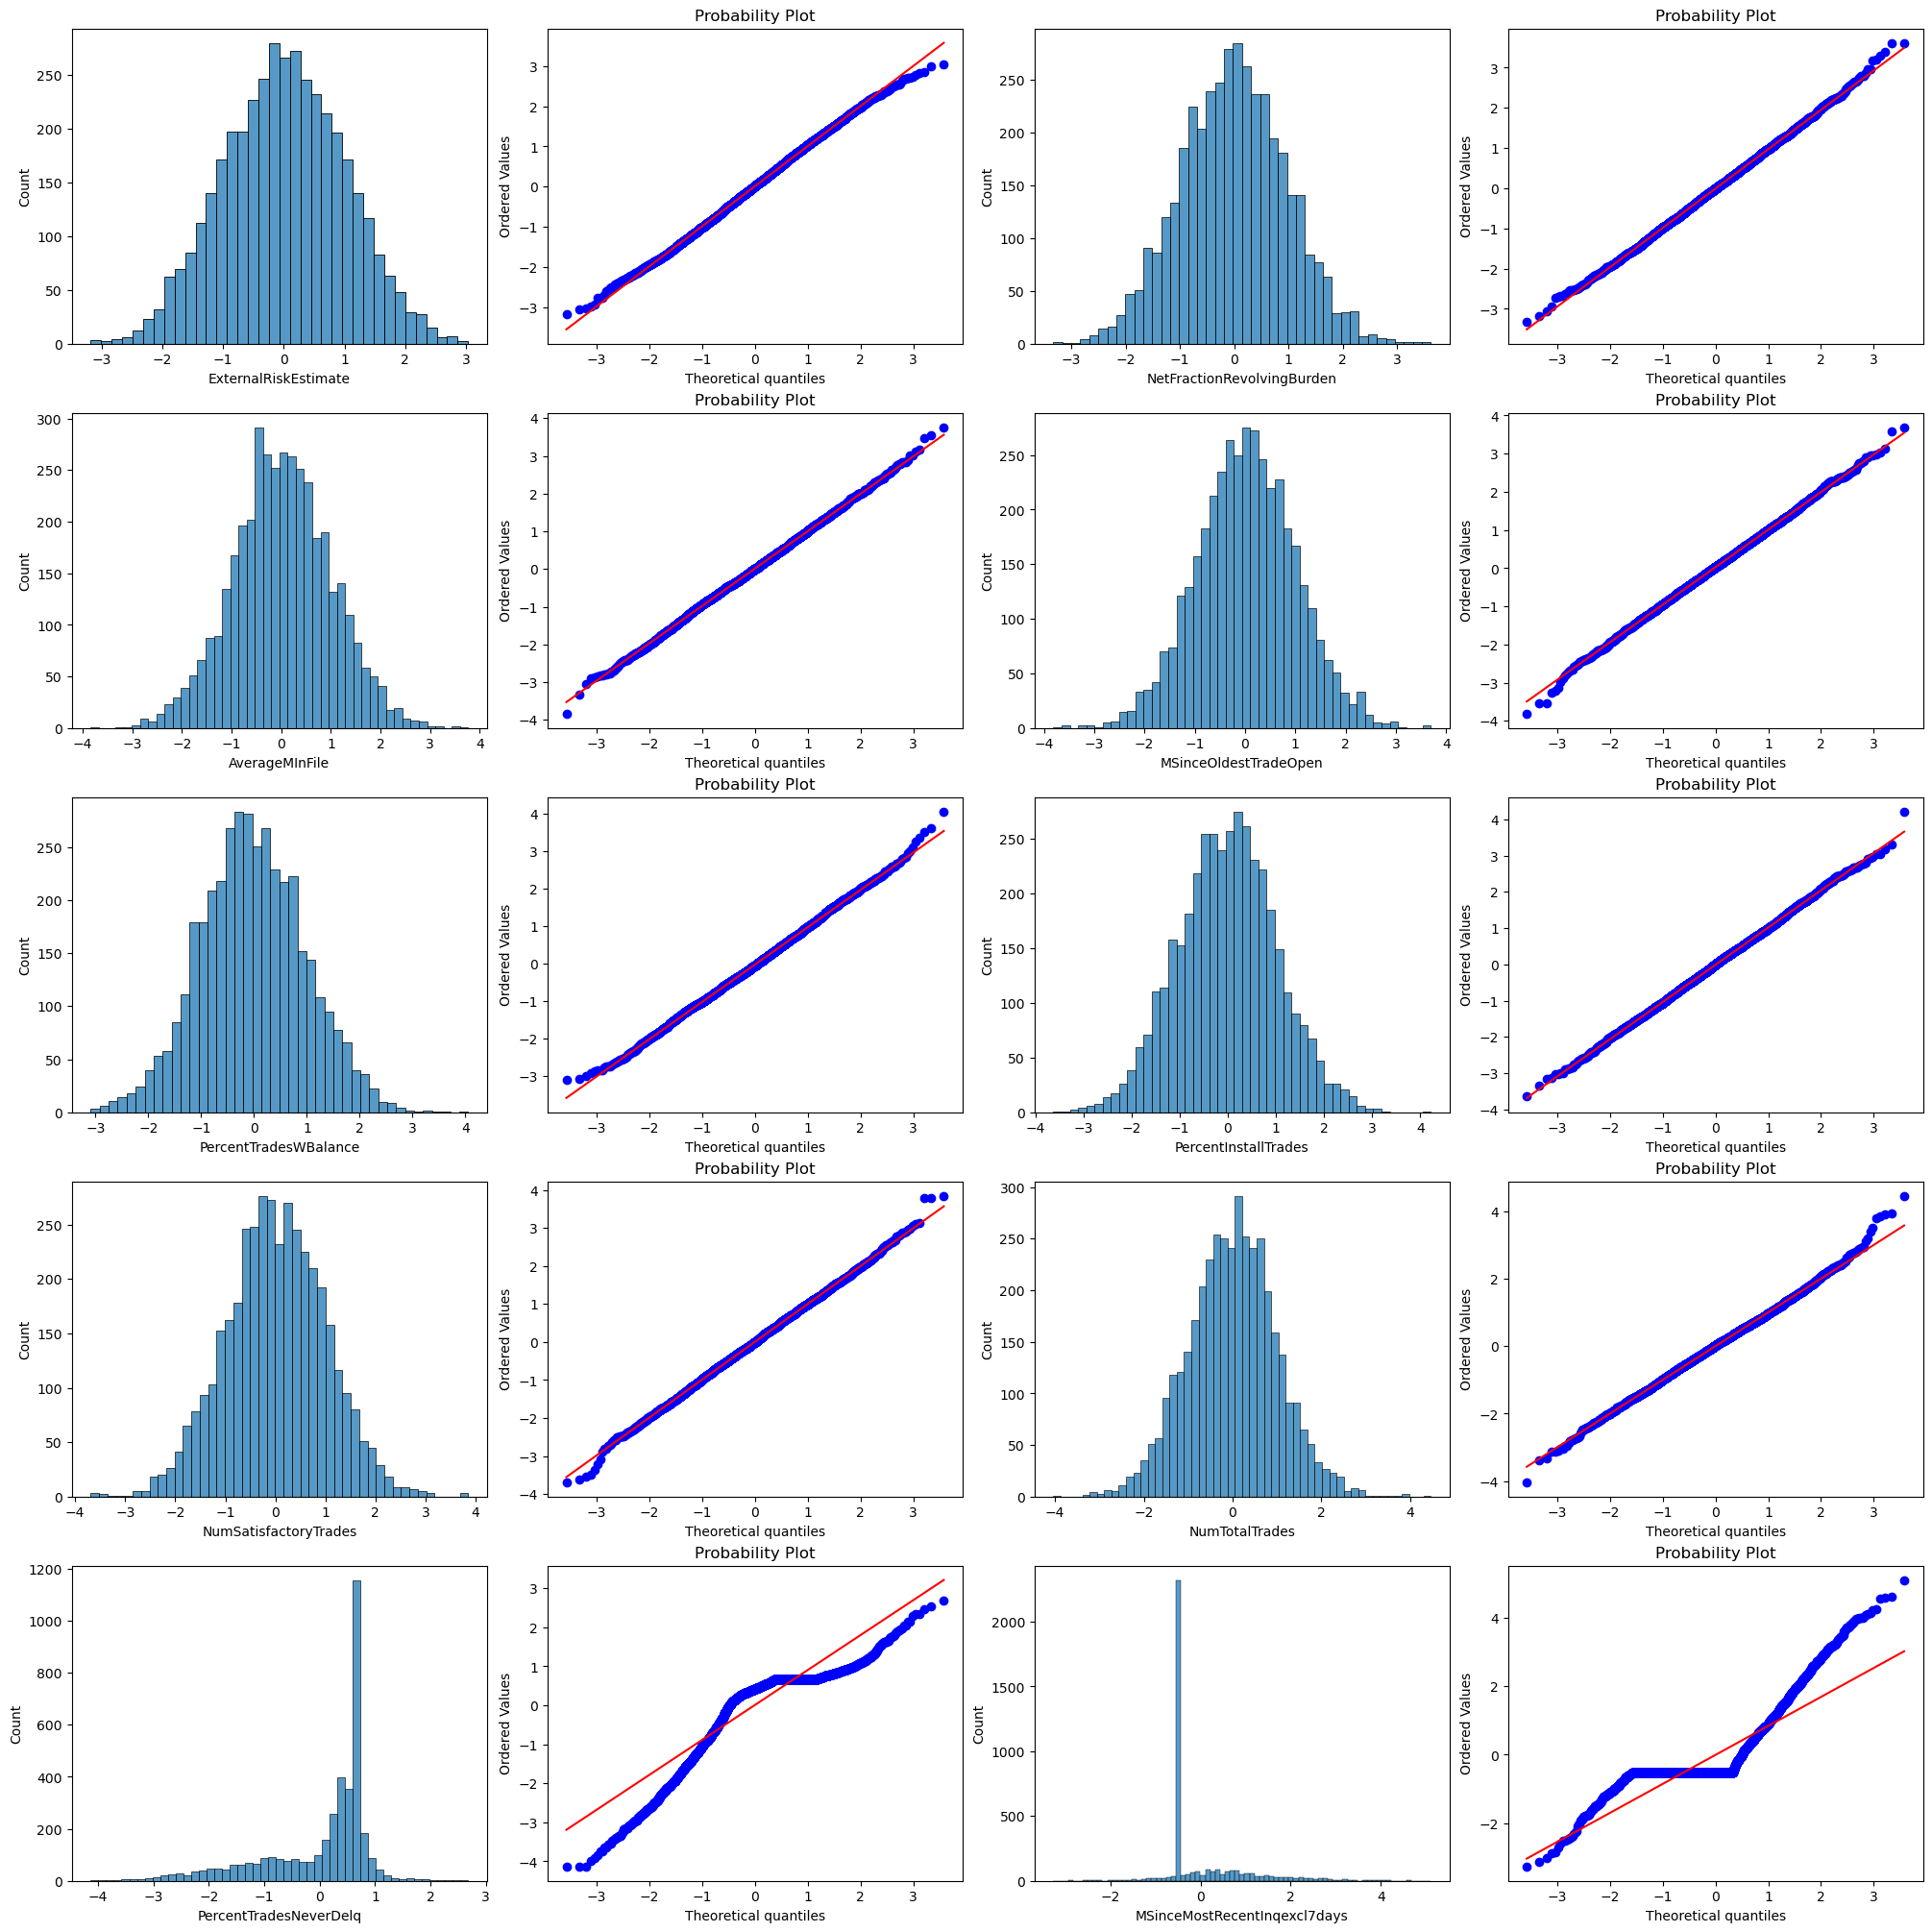

In [79]:
from cleaning_data.EDA_utils import plot_qq_plot
plot_qq_plot(X_generated_df)